# Simple Linear Regression

In [1]:
# from google.colab import files
# up = files.upload()

## import library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


## import data set

In [ ]:
df = pd.read_csv('FuelConsumption.csv')
df = df[['ENGINESIZE', 'CO2EMISSIONS']]
df.head(3)

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136


In [ ]:
# df.size
# df.shape
# df.info()
# df.describe()

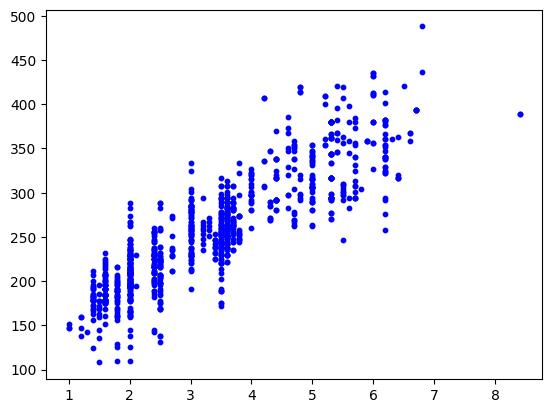

In [ ]:
plt.scatter(df['ENGINESIZE'], df['CO2EMISSIONS'],s=10, color='blue')
plt.show()

## cleaning

In [ ]:
# clean the data here

## define x , y

In [ ]:
x = np.array(df[['ENGINESIZE']])
y = np.array(df['CO2EMISSIONS'])

# x = df[['ENGINESIZE']].values
# y = df['CO2EMISSIONS'].values

In [ ]:
y[:5]

array([196, 221, 136, 255, 244])

## spliting the data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
### spliting without sklearn

# msk = np.random.rand(len(df)) < 0.8
# train = df[msk]
# test = df[~msk]

# x_train = np.array(train[['ENGINESIZE']])
# x_test = np.array(test[['ENGINESIZE']])
# y_train = np.array(train[['CO2EMISSIONS']])
# y_test = np.array(test[['CO2EMISSIONS']])

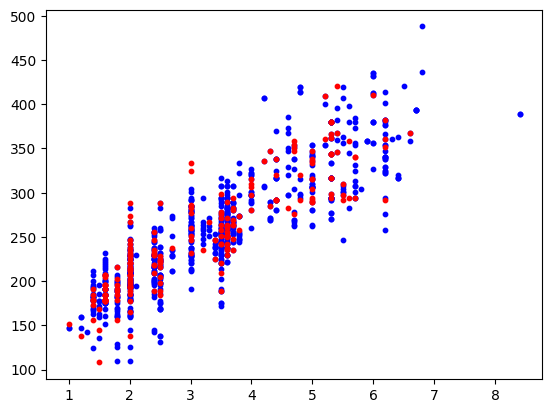

In [ ]:
plt.scatter(x_train, y_train, s=10, c='b')
plt.scatter(x_test, y_test, s=10, c='r')
plt.show()

## K-fold cross validation

In [ ]:
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import GridSearchCV

# parameters = {
#     '': [],
#     '': []
# }

# lr = LinearRegression()
# gs = GridSearchCV(estimator=lr, param_grid=parameters, cv=5)

# gs.fit(x_train, y_train)

# best_params = gs.best_params_
# print(best_params)

## fit train data

In [ ]:
# def param
# fit_intercept=True, copy_X=True, n_jobs=None, positive=False

In [ ]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()

In [ ]:
slr.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(slr.intercept_)
print(slr.coef_)

124.82884117402358
[39.12892417]


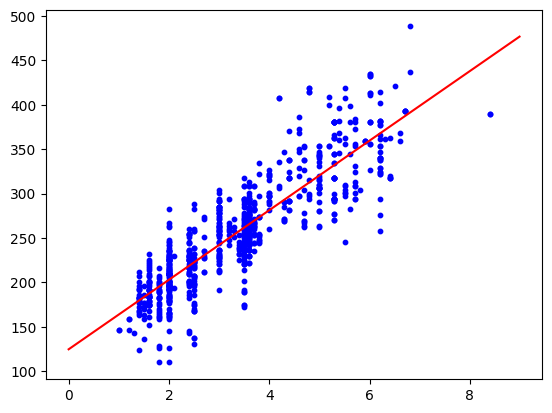

In [ ]:
xx = np.arange(0,9,0.01)
plt.scatter(x_train, y_train, s=10, c='b')
plt.plot(xx, slr.intercept_ + slr.coef_[0] * xx, c='r')
plt.show()

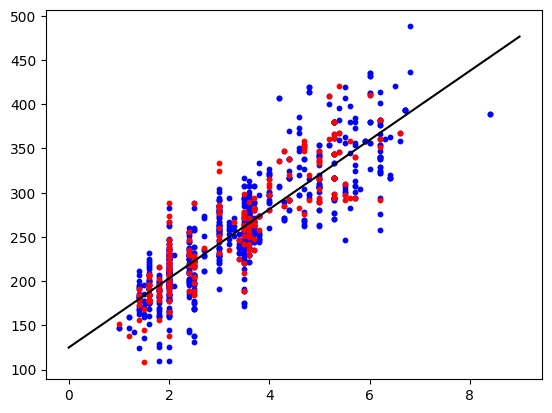

In [ ]:
xx = np.arange(0,9,0.01)
plt.scatter(x_train, y_train, s=10, c='b')
plt.plot(xx, slr.intercept_ + slr.coef_[0] * xx, c='black')
plt.scatter(x_test, y_test, c='r', s=10)
plt.show()

## predict test data

In [ ]:
yhat_test = slr.predict(x_test)

## evaluate the model

In [ ]:
from sklearn.metrics import r2_score
print("r2-score: %0.2f" % r2_score(y_test, yhat_test))

r2-score: 0.79


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, yhat_test)
mean_squared_error(y_test, yhat_test)

831.6401538451615

In [ ]:
### evaluate without sklearn

# print("MAE: %0.2f" % np.mean(np.absolute(y_test - yhat_test)))
# print("MSE: %0.2f" % np.mean((y_test - yhat_test) ** 2))

## predict new data

In [ ]:
slr.predict([[0]])

array([124.82884117])

## save the model

In [ ]:
# import joblib
# joblib.dump(slr, 'slr_model.pkl')

## load the model

In [ ]:
# import joblib
# slr = joblib.load('slr_model.pkl')